In [52]:
import torch 
import torch.nn as nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib.pylab import plt

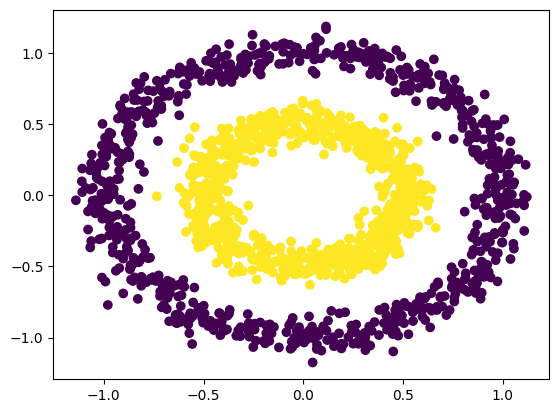

In [53]:
X, y = make_circles(n_samples=2000, factor=0.5, noise=0.07 )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float().unsqueeze(1)
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

In [54]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 4)
        self.linear2 = nn.Linear(4,4)
        self.linear3 = nn.Linear(4, 4)
        self.linear4 = nn.Linear(4, 1)
        self.reLU= nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.sigmoid( self.linear4(self.reLU(self.linear3(self.reLU(self.linear2(self.reLU(self.linear(x))))))))

In [55]:
model = Classifier()


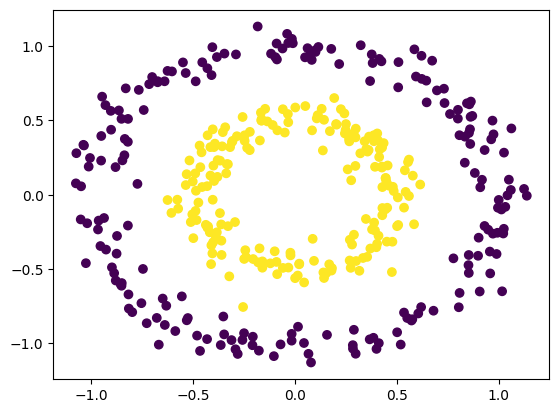

In [62]:
with torch.inference_mode():
    predictions = model(X_test)
    predictions = torch.round(predictions)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)
    plt.show()

In [57]:
def trainer(epochs,model,loss_fn,optimizer,X_train,y_train):
    model.train(True)
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = loss_fn(predictions, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"{epoch} {loss}")

In [61]:
learning_rate = 0.01

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

trainer(10000, model, loss_fn, optimizer, X_train, y_train)

0 0.002888452960178256
100 0.002859228290617466
200 0.0028305959422141314
300 0.002802550094202161
400 0.0027750423178076744
500 0.002748097525909543
600 0.002721661701798439
700 0.002695733681321144
800 0.002670296933501959
900 0.0026453512255102396
1000 0.002620869781821966
1100 0.0025968486443161964
1200 0.002573262667283416
1300 0.0025501123163849115
1400 0.002527363831177354
1500 0.0025050255935639143
1600 0.00248307129368186
1700 0.0024615072179585695
1800 0.002440311945974827
1900 0.002419488737359643
2000 0.0023990103509277105
2100 0.002378881210461259
2200 0.0023590833880007267
2300 0.002339600119739771
2400 0.0023204348981380463
2500 0.0023015676997601986
2600 0.0022830208763480186
2700 0.0022647581063210964
2800 0.00224678753875196
2900 0.00222910288721323
3000 0.002211682964116335
3100 0.0021945491898804903
3200 0.0021776598878204823
3300 0.0021610360126942396
3400 0.002144677098840475
3500 0.0021285342518240213
3600 0.0021126470528542995
3700 0.002096998505294323
3800 0.00